In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## News sentiment

C:\Users\Justin\AppData\Local\Temp\ipykernel_13448\1265559075.py:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_daily = df_filtered.resample('H', on='DATE').mean().reset_index()


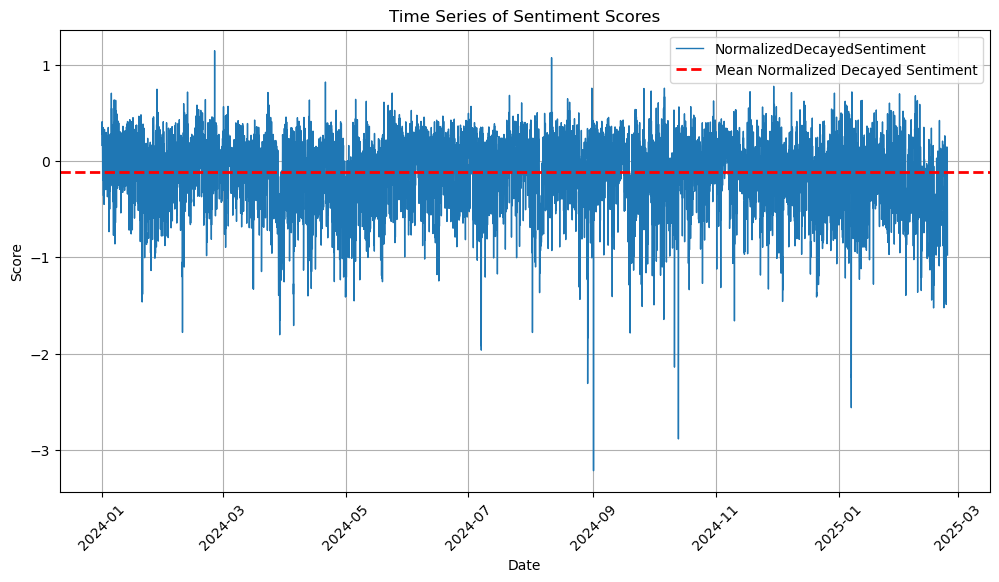

In [ ]:
GDELT_folder_path = '../data/GDELT_Bitcoin_Sentiment/'
GDELT_file1 = os.path.join(GDELT_folder_path, "GDELTS_smooth_score.csv_part1.csv")
GDELT_file2 = os.path.join(GDELT_folder_path,"GDELTS_smooth_score.csv_part2.csv")

# Read CSV files
df1 = pd.read_csv(GDELT_file1)
df2 = pd.read_csv(GDELT_file2)

# Merge the two datasets
df = pd.concat([df1, df2])

# Select only specific columns
df = df[['DATE', 'OverallScore', 'DecayedSentiment', 'NormalizedDecayedSentiment']]

# Convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Ensure numeric columns are actually numeric
numeric_cols = ['OverallScore', 'DecayedSentiment', 'NormalizedDecayedSentiment']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Sort by date to ensure correct time series plotting
df = df.sort_values(by='DATE')

start_date = df['DATE'].min()
end_date = start_date + pd.Timedelta(weeks=60)
df_filtered = df[(df['DATE'] >= start_date) & (df['DATE'] < end_date)]

# Aggregate by hour instead of day: Compute the daily mean for each sentiment score
df_daily = df_filtered.resample('H', on='DATE').mean().reset_index()

# Calculate the mean of 'NormalizedDecayedSentiment' for the first x weeks
mean_normalized_sentiment = df_daily['NormalizedDecayedSentiment'].mean()

# Plot the time series with 3 lines
plt.figure(figsize=(12, 6))
plt.plot(df_daily['DATE'], df_daily['NormalizedDecayedSentiment'], label='NormalizedDecayedSentiment', linewidth=1)
plt.axhline(y=mean_normalized_sentiment, color='red', linestyle='--', linewidth=2, label="Mean Normalized Decayed Sentiment")

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Score")
plt.title("Time Series of Sentiment Scores")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


## BTC Price and Reddit Sentiment

In [5]:
processed_data_folder_path = '../data/processed/'
btc_reddit_data_path = os.path.join(processed_data_folder_path, "btc_usdt_hourly_processed_with_sentiment.csv")
btc_reddit_data = pd.read_csv(btc_reddit_data_path)

# Convert DATE column to datetime format
btc_reddit_data['datetime'] = pd.to_datetime(btc_reddit_data['datetime'])
btc_reddit_data = btc_reddit_data.sort_values(by='datetime')

In [6]:
btc_reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8110 entries, 0 to 8109
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datetime                    8110 non-null   datetime64[ns, UTC]
 1   OPEN                        8110 non-null   float64            
 2   HIGH                        8110 non-null   float64            
 3   LOW                         8110 non-null   float64            
 4   CLOSE                       8110 non-null   float64            
 5   TOTAL_TRADES                8110 non-null   int64              
 6   TOTAL_TRADES_BUY            8110 non-null   int64              
 7   TOTAL_TRADES_SELL           8110 non-null   int64              
 8   VOLUME                      8110 non-null   float64            
 9   VOLUME_BUY                  8110 non-null   float64            
 10  VOLUME_SELL                 8110 non-null   float64         

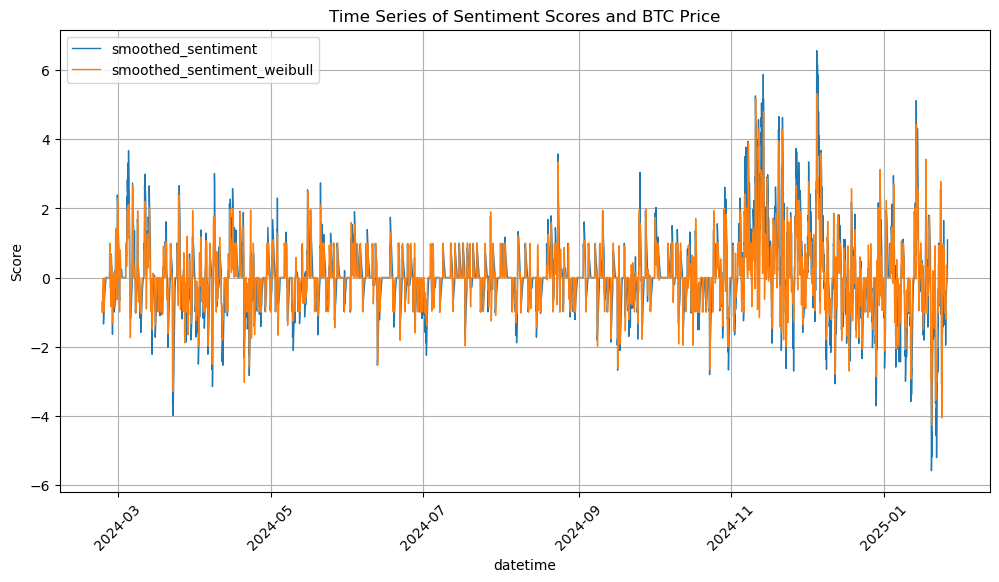

In [8]:
# Plot btc price and sentiment

plt.figure(figsize=(12, 6))
plt.plot(btc_reddit_data['datetime'], btc_reddit_data['smoothed_sentiment'], label='smoothed_sentiment', linewidth=1)
plt.plot(btc_reddit_data['datetime'], btc_reddit_data['smoothed_sentiment_weibull'], label='smoothed_sentiment_weibull', linewidth=1)
# Formatting the plot
plt.xlabel("datetime")
plt.ylabel("Score")
plt.title("Time Series of Sentiment Scores and BTC Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [ ]:
# Create a new dataframe with selected features
btc_reddit_data_selected_features = btc_reddit_data[['datetime',  
                       'EMA_8','EMA_13','EMA_21','EMA_signal','EMA_short','EMA_long', 
                       'MACD','Signal_Line','MACD_Hist',
                       'RSI_14',
                       'smoothed_sentiment_weibull',
                       'post_density',
                       'return',
                       'hourly_volatility',
                       'TOTAL_TRADES',
                       'TOTAL_TRADES_BUY',
                       'TOTAL_TRADES_SELL',
                       'VOLUME'
                      ]]


## Telegram Data

In [21]:
processed_data_folder_path = '../data/processed/'
telegram_data_path = os.path.join(processed_data_folder_path, "tele_messages_processed_hourly.csv")
btc_telegram_data = pd.read_csv(telegram_data_path, index_col=0).reset_index().rename(columns = {'index': 'date'})

# Convert DATE column to datetime format
btc_telegram_data['date'] = pd.to_datetime(btc_telegram_data['date'])
btc_telegram_data = btc_telegram_data.sort_values(by='date').reset_index(drop = True)

In [23]:
btc_telegram_data.columns

Index(['date', 'text', 'channel_FedRussianInsiders',
       'channel_TechCryptoAnalyst', 'channel_Whalesguide',
       'channel_binancekillers', 'channel_cryptoclubpump',
       'channel_wallstreetqueenofficial', 'year', 'week', 'day', 'sentiment',
       'smoothed_sentiment', 'smoothed_sentiment_weibull'],
      dtype='object')

In [24]:
tele_data = btc_telegram_data[['date', 'smoothed_sentiment_weibull']]

## MERGE